# Model Fitting

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("C:/Users/kimch/Desktop/hospital_preprocessed_dataset/Train.csv")
test = pd.read_csv("C:/Users/kimch/Desktop/hospital_preprocessed_dataset/Test.csv")

In [4]:
# 저번엔 몰랐는데 숫자로 표현된 범주형 변수들이 kNNImputer 돌리면서 연속형으로 채워진 것 같아서 .5 기준으로 컷오프로 대체 

In [5]:
# ownerChange
train["ownerChange"] = round(train["ownerChange"])
# bedCount_class
train["bedCount_class"] = round(train["bedCount_class"])

In [6]:
test["ownerChange"] = round(test["ownerChange"])
test["bedCount_class"] = round(test["bedCount_class"])

In [7]:
# instkind_nan drop 시킴 -> nan 보통 안 만드는 것 같음, 원핫인코딩 했을 때 파라미터로 처리 했어야한 것 같은데 암튼 지금 함 

In [8]:
train = train.drop(columns=["instkind_nan"])
test = test.drop(columns=["instkind_nan"])

In [9]:
# inst_id set_index

In [10]:
train = train.set_index("inst_id")
test = test.set_index("inst_id")

In [11]:
train

,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
inst_id,,,,,,,,,,,,,,,,,,,,,
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
9,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.685753,0.000000,22.641007,22.503290,22.405862,20.514569,5.267858,4.955827,0.0,3.0
423,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.382027,4.382027,0.0,3.0
426,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,21.498441,0.000000,22.158142,21.639056,21.904736,0.000000,3.860891,3.905642,0.0,3.0


In [12]:
test

,OC,sido_choongchung,sido_gyeongin,sido_gyeongsang,sido_jeju,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
inst_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,24.648885,24.338050,22.275075,22.268698,23.501178,22.914314,6.542472,6.542472,0.0,3.0
5,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,24.463273,23.909618,23.950510,23.630167,22.055404,0.000000,5.940171,5.918894,0.0,2.0
6,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,24.047434,23.806220,0.000000,0.000000,0.000000,23.519657,5.285888,5.225619,0.0,3.0
8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,22.980460,22.170624,21.662855,0.000000,24.390483,0.000000,6.634633,6.634633,0.0,4.0
10,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,22.742900,21.916712,24.318498,23.784183,23.971502,23.436150,6.082219,5.955837,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,23.279082,0.000000,21.735002,0.000000,23.351521,0.000000,6.329721,4.949613,0.0,3.0
425,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.042985,0.000000,21.310989,21.277151,22.872059,22.688514,4.890349,4.927254,0.0,3.0
429,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.588876,4.544446,0.0,3.0


## Train -> Train, Valid, Test

References: https://wkddmswh99.tistory.com/10

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = train.drop(columns=["OC"])
y = train["OC"]

# train:valid:test 로 나누는 건 파라미터 튜닝 할 때 해도 될 것 같아서 일단 train:valid로 나눔 
# train:valid = 8:2
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
train_y.shape

(240,)

In [16]:
valid_y.shape

(61,)

## Feature Selection

In [17]:
from sklearn.feature_selection import SelectFromModel

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [19]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"))
embeded_lr_selector.fit(train_X, train_y)

SelectFromModel(estimator=LogisticRegression())

In [20]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), "selected feature")

27 selected feature


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="1.25*median")
embeded_rf_selector.fit(train_X, train_y)

SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [23]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), "selected feature")

20 selected feature


In [24]:
# LightGBM
from lightgbm import LGBMClassifier

In [25]:
embeded_lgbm_selector = SelectFromModel(LGBMClassifier(n_estimators=500, learning_rate=0.05))
embeded_lgbm_selector.fit(train_X, train_y)

SelectFromModel(estimator=LGBMClassifier(learning_rate=0.05, n_estimators=500))

In [26]:
embeded_lgbm_support = embeded_lgbm_selector.get_support()
embeded_lgbm_feature = train_X.loc[:,embeded_lgbm_support].columns.tolist()
print(str(len(embeded_lgbm_feature)), "selected feature")

29 selected feature


In [27]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
embeded_gbm_selector = SelectFromModel(GradientBoostingClassifier(random_state=0))
embeded_gbm_selector.fit(train_X, train_y)

SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))

In [29]:
embeded_gbm_support = embeded_gbm_selector.get_support()
embeded_gbm_feature = train_X.loc[:,embeded_gbm_support].columns.tolist()
print(str(len(embeded_gbm_feature)), "selected feature")

22 selected feature


In [30]:
# Summary
features = train_X.columns.tolist()

pd.set_option("display.max_rows", None)

feature_selection_df = pd.DataFrame({'Feature': features, "Logistc": embeded_lr_support, "RandomForest": embeded_rf_support,"GBM": embeded_gbm_support, "LGBM": embeded_lgbm_support})
feature_selection_df["Total"] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(["Total", "Feature"], ascending=False)
feature_selection_df

,Feature,Logistc,RandomForest,GBM,LGBM,Total
14,sga1,True,True,True,True,4
15,salary1,True,True,True,True,4
12,revenue1,True,True,True,True,4
44,profit2,True,True,True,True,4
20,profit1,True,True,True,True,4
42,interest2,True,True,True,True,4
18,interest1,True,True,True,True,4
23,receivableS1,False,True,True,True,3
28,receivableL1,True,True,True,False,3
22,quickAsset1,False,True,True,True,3


References : https://hwi-doc.tistory.com/entry/Feature-selection-feature-importance-vs-permutation-importance

### feature importance  
편향에 대해서도 학습하기 때문에, 절대적인 기준 아님 

In [59]:
rf = RandomForestClassifier(random_state=11)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=11)

In [44]:
rf_important_values = rf.feature_importances_
rf_important_values_s = pd.Series(rf_important_values, index=train_X.columns)
rf_important10 = rf_important_values_s.sort_values(ascending=False)[:10]

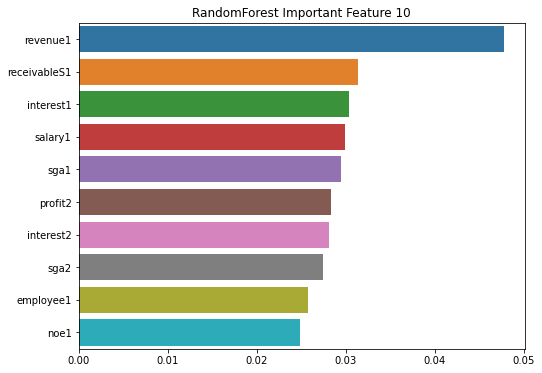

In [45]:
plt.figure(figsize=(8,6))
plt.title('RandomForest Important Feature 10')
sns.barplot(x=rf_important10, y=rf_important10.index)
plt.show()

In [58]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(train_X, train_y)

GradientBoostingClassifier(random_state=0)

In [47]:
gbm_important_values = gbm.feature_importances_
gbm_important_values_s = pd.Series(gbm_important_values, index=train_X.columns)
gbm_important10 = gbm_important_values_s.sort_values(ascending=False)[:10]

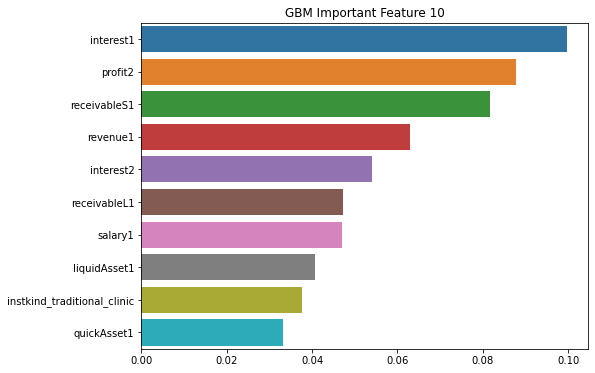

In [48]:
plt.figure(figsize=(8,6))
plt.title('GBM Important Feature 10')
sns.barplot(x=gbm_important10, y=gbm_important10.index)
plt.show()

### permutation importance   
shuffle 했을 때 모델의 성능이 떨어지면 중요한 feature, 그렇지 않으면 제거해도 되는 feature 

In [37]:
import eli5 
from eli5.sklearn import PermutationImportance

In [39]:
permu_rf = PermutationImportance(rf, scoring="accuracy", random_state=31).fit(valid_X, valid_y)
eli5.show_weights(permu_rf, top= 10, feature_names=valid_X.columns.tolist())

Weight,Feature
0.0033 ± 0.0131,interest2
0 ± 0.0000,receivableS1
0 ± 0.0000,nonCAsset1
0 ± 0.0000,liquidLiabilities1
0 ± 0.0000,interest1
0 ± 0.0000,quickAsset1
0 ± 0.0000,liquidAsset1
0 ± 0.0000,profit1
0 ± 0.0000,ctax1
0 ± 0.0000,bedCount_class


In [42]:
permu_gbm = PermutationImportance(gbm, scoring="accuracy", random_state=31).fit(valid_X, valid_y)
eli5.show_weights(permu_gbm, top=10, feature_names=valid_X.columns.tolist())

Weight,Feature
0.0066 ± 0.0161,salary1
0.0033 ± 0.0131,instkind_nursing_hospital
0 ± 0.0000,inventoryAsset1
0 ± 0.0000,tanAsset1
0 ± 0.0000,interest1
0 ± 0.0000,receivableS1
0 ± 0.0000,quickAsset1
0 ± 0.0000,profit1
0 ± 0.0000,ctax1
0 ± 0.0000,bedCount_class


최종 변수 선택 결과 (feature selection, feature importances, permutation importance 결과 종합):     
sga1, salary1, revenue1, profit2, interest2, interest1, receivableS1, reveivableL1, quickAsset1, liquidAsset1, employee2, debt1, instkind_nursing_hospital

In [84]:
fs = ["sga1", "salary1", "revenue1", "profit2", "interest2", "interest1", "receivableS1", "receivableL1", "quickAsset1", "liquidAsset1", "employee2", "debt1", "instkind_nursing_hospital"]

In [98]:
# 덜 결과주의적... 인 것 
fs_ = ["sga1", "salary1", "revenue1", "profit2", "interest2", "interest1", "receivableS1", "instkind_nursing_hospital"]

결과주의적인 것 같긴 함,,, model 선택, feature selection 무엇을 먼저 하는지..? -> 동시에 해야한다고 함

## Oversampling

In [85]:
# oversample only train set

In [86]:
train_y.value_counts()

1    228
0     12
Name: OC, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE(random_state=42)

In [89]:
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y)

In [90]:
train_y_smote.value_counts()

1    228
0    228
Name: OC, dtype: int64

# Model Fitting  
References : https://swingswing.tistory.com/281

앙상블 기법 => 주어진 데이터로부터 여러 개의 모델을 학습한 다음, 여러 모델들의 예측 결과를 종합해 정확도를 높임, 의사결정나무의 과적합 문제를 해결  
-voting, bagging, boosting, stacking   
voting:  
(hard): 다수결 원칙: 다수의 분류기가 결정한 예측값을 최종 결과값으로 선정   
(soft): 레이블 값 결정확률을 모두 더해 이를 평균 냈을 때 확률이 가장 높은 레이블 값을 최종 결과값으로 선정   
bagging: 부트스트랩(랜덤 샘플링)을 집계, 각각의 분류기들이 독립적으로 학습을 끝낸 다음 결과를 종합    
boosting: bagging과 거의 동일 매커니즘을 갖고 있음 but 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터에 샘플 가중치를 조정해 학습을 진행   
stacking: cross validation 기반 서로 상이한 모델 조합, 개별 모델이 예측한 데이터를 다시 데이터셋으로 사용해서 학습   

## Random Forest  
references :  
https://hleecaster.com/ml-random-forest-concept/  
https://wooono.tistory.com/115  
https://injo.tistory.com/30?category=1068433

앙상블 - bagging   
prob ) feature가 여러개 있을 때 다 사용 -> 과적합   
sol ) feature 중 랜덤으로 일부 feature만 무작위로 선택  
과정 )  
-전체 특징 중 일부 특징을 무작위로 선택    
-선택된 특징들을 사용해 가장 잘 예측하는 나무 구성   
-원하는 개수의 나무가 생성되기 까지 반복 -> 숲  
-다수결 원칙에 따라 최종 예측값으로  

- 장점 )   
분류, 회귀 둘 다 쓰임, 결측치 다루기 쉬움, 대용량 데이터 처리 효과적, 과적합 문제 x, 분류 문제에서 상대적으로 중요한 변수 선정 가능, 결정 트리의 쉽고 직관적인 장점, 앙상블 알고리즘 중 비교적 빠른 수행 속도, 다양한 분야에서 좋은 성능  
  
- 단점 )   
하이퍼 파라미터가 많아 튜닝하는데 시간이 많이 소요, 예측성능 크게 향상되는 경우 많지 않음

파라미터 (GridSearchCV)   
**n_estimators**: 랜덤포레스트 안의 결정나무 갯수, 많을수록 좋으나 메모리와 시간 소요, default: 10  
**max_features**: 무작위로 선택할 feature 개수  
**bootstrap**: default: True - 복원추출로 feature 선택, feature를 선택할 때에는 전체 속성 개수의 제곱근만큼 선택하는게 좋다 (default: sqrt)  
**max_depth** : 결정나무의 깊이  
**min_samples_leaf** : 리프노드가 되기 위한 최소한의 샘플 데이터 수 (default: 1)  
**min_samples_split** : 노드를 분할하기 위한 최소한의 데이터 수 (default: 2)   
**max_leaf_nodes** : 리프노드의 최대 개수 (deafualt: None)  
**min_impurity_decrease** : 불순도가 줄어든 정도가 지정해준 값보다 높아야 (=최소 지정해준 값은 되어야) split 됨 (default: 0.0)

In [91]:
rf.fit(train_X_smote[fs], train_y_smote)

RandomForestClassifier(random_state=11)

In [92]:
from dmba import classificationSummary

In [93]:
classificationSummary(train_y_smote, rf.predict(train_X_smote[fs]))

Confusion Matrix (Accuracy 0.9956)

       Prediction
Actual   0   1
     0 228   0
     1   2 226


In [94]:
classificationSummary(valid_y, rf.predict(valid_X[fs]))

Confusion Matrix (Accuracy 0.9508)

       Prediction
Actual  0  1
     0  0  3
     1  0 58


## GBM  
references :   
https://injo.tistory.com/31  
https://velog.io/@dbj2000/ML%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Random-Forest-GBM

앙상블 - boosting
GBM -> LightGBM, CatBoost, XGBoost   
cf: ADABoost : weak learner의 오류 데이터에 가중치를 부여하면서 부스팅을 수행  
과정 )    
-간단한 모델A를 통해 y를 예측   
-남은 잔차로 모델B에 적용해 예측  
-각 스텝에서 잘못 예측된 데이터에 대하여 가중치를 부여하여 잔차 줄여나가고 예측 결정 기준을 결합해 최종 예측결정 기준을 만들게 됨   
-> 가중치 업데이트 방식: 경사하강법 (Gradient Descent)  
경사하강법: 잔차가 negative gradient : loss function이 줄어드는 방식   
loss function: 분류의 실제값 y, feature에 기반한 예측함수: F(x), 오류식: h(x)=y-F(x) => 오류식 h(x)를 최소화하는 방식   
(모델 A,B: weak learner / 모델 A+B: strong learner)  

- 장점 )   
과적합에도 강한 뛰어난 예측 성능
  
- 단점 )   
긴 수행시간

파라미터 (GridSearchCV)   
*Tree 관련 파라미터*  
**max_depth**: 트리의 최대 깊이, 깊을수록 과적합 가능성 (default: 3)  
**min_samples_split**: 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어, 작게 설정할수록 과적합 가능성 (default: 2)  
**min_samples_leaf**: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수, 과적합 제어, 불균형 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 작게 설정 필요 (deafult: 1)  
**max_features**: 최적의 분할을 위해 고려할 최대 feature 개수 (default: None- 모든 피처 사용)  
**max_leaf_nodes**: 리프 노드의 최대 개수 (deafult=None- 제한 없음)  
*Boosting 관련 파라미터*  
**loss**: 경사하강법에서 사용할 cost function 지정 (default: deviance)  
**n_estimators**: 생성할 트리의 개수 지정 (default: 100)  
**learning_rate**: 학습을 진행할 때마다 적용하는 학습률, weak learner가 순차적으로 오류값을 보정해나갈 때 적용, 낮은만큼 최소 오류 값을 찾아 예측성능 좋아짐 (default: 0.1)  
**subsample**: 개별 트리가 학습에 사용하는 데이터 샘플링 비율 (0~1), 이 값을 조정하므로써 트리 간의 상관도를 줄임 (default: 1- 전체 데이터 학습)


In [95]:
gbm.fit(train_X_smote[fs], train_y_smote)

GradientBoostingClassifier(random_state=0)

In [96]:
classificationSummary(train_y_smote, gbm.predict(train_X_smote[fs]))

Confusion Matrix (Accuracy 0.9956)

       Prediction
Actual   0   1
     0 228   0
     1   2 226


In [97]:
classificationSummary(valid_y, gbm.predict(valid_X[fs]))

Confusion Matrix (Accuracy 0.9344)

       Prediction
Actual  0  1
     0  0  3
     1  1 57
